In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/블록체인

/content/gdrive/My Drive/블록체인


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
Train = pd.read_csv('./Data/Train001.csv')
Test = pd.read_csv('./Data/Test001.csv')

In [ ]:
nRow, nCol = Train.shape
print(f'Train: There are {nRow} rows and {nCol} columns')

Train: There are 59131 rows and 11 columns


In [ ]:
nRow, nCol = Test.shape
print(f'Test: There are {nRow} rows and {nCol} columns')

Test: There are 58817 rows and 11 columns


<br>
<br>
<br>
<br>
<br>

# Normalization

In [ ]:
Train_X = Train.iloc[:,:10]
Train_Label = Train[['category']]
Train_Y = np.array(Train['category']).reshape(-1,1)

In [ ]:
Test_X = Test.iloc[:,:10]
Test_Label = Test[['category']]
Test_Y = np.array(Test['category']).reshape(-1,1)

In [ ]:
num_col = list(Train_X.columns)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

stdenc = StandardScaler()
stdenc.fit(Train_X)
Train_X = stdenc.transform(Train_X)

labelenc = LabelEncoder()
labelenc.fit(Train_Y)
Train_Y = labelenc.transform(Train_Y)

# onehot = OneHotEncoder()
# onehot.fit(Train_Y)
# Train_Y = onehot.transform(Train_Y).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Train_X

array([[-1.16753605, -0.47886005, -1.36519527, ..., -0.00771526,
        -0.04615777, -0.57176724],
       [ 1.69199907, -1.157036  , -1.45981622, ..., -0.00806124,
        -2.58307011, -1.0393403 ],
       [-0.61330934, -0.81424175,  0.9672957 , ..., -0.00806124,
         0.71894277,  0.41533143],
       ...,
       [ 1.61843202, -1.27640045, -1.45489628, ..., -0.00806124,
        -2.50253321, -4.00063632],
       [ 1.7041213 , -1.58360656, -1.45123999, ...,  1.2988571 ,
        -2.54280166, -3.79282607],
       [ 1.61812221, -1.53020459, -1.4598865 , ..., -0.00806124,
        -2.8246808 , -4.36430425]])

In [ ]:
Train_Y

array([1, 3, 1, ..., 2, 4, 2])

In [ ]:
Test_X = stdenc.transform(Test_X)

Test_Y = labelenc.transform(Test_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Test_X

array([[-1.10023572, -0.73969493,  0.71318103, ..., -0.00806124,
         0.71894277,  0.41533143],
       [ 1.58491846,  0.08042544,  0.93022836, ..., -0.00806124,
         0.71894277,  0.41533143],
       [-1.47285902, -1.30917103, -1.45479711, ..., -0.00757478,
         0.71894277,  0.41533143],
       ...,
       [ 1.6184461 , -1.56072376, -1.4598865 , ..., -0.00806124,
        -2.50253321, -4.36430425],
       [ 1.61819825, -1.58465985,  1.79882289, ..., -0.00806124,
        -3.0662915 , -4.41625681],
       [ 1.61845455, -1.58462035,  1.76635958, ..., -0.00806124,
        -3.26763375, -4.5721145 ]])

In [ ]:
Test_Y

array([1, 0, 1, ..., 2, 2, 2])

# Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
def eval_Train(Train_Pred, Train_Label):
    Train_Pred_Label = pd.DataFrame(Train_Pred, columns=['category_pred'])
    Train_Pred_Label['category_pred'] = Train_Pred_Label['category_pred'].apply(lambda x: label_dict[x])

    print('Train Accuracy: ', accuracy_score(Train_Label, Train_Pred_Label))
    print('Recall (Macro)', recall_score(Train_Label, Train_Pred_Label, average='macro'))
    print('Precision (Macro)', precision_score(Train_Label, Train_Pred_Label, average='macro'))
    print('F1 score (Macro)', f1_score(Train_Label, Train_Pred_Label, average='macro'))
    print('\n')

    print(pd.crosstab(Train_Label['category'], Train_Pred_Label['category_pred']))

In [ ]:
def eval_Test(Test_Pred, Test_Label):
    Test_Pred_Label = pd.DataFrame(Test_Pred, columns=['category_pred'])
    Test_Pred_Label['category_pred'] = Test_Pred_Label['category_pred'].apply(lambda x: label_dict[x])

    print('Test Accuracy: ', accuracy_score(Test_Label, Test_Pred_Label))
    print('Recall (Macro)', recall_score(Test_Label, Test_Pred_Label, average='macro'))
    print('Precision (Macro)', precision_score(Test_Label, Test_Pred_Label, average='macro'))
    print('F1 score (Macro)', f1_score(Test_Label, Test_Pred_Label, average='macro'))
    print('\n')

    print(pd.crosstab(Test_Label['category'], Test_Pred_Label['category_pred']))

In [ ]:
Train_df = pd.concat([Train_Label, pd.DataFrame(Train_Y, columns = ['label'])], axis=1)
Train_df = Train_df.drop_duplicates()

In [ ]:
label_dict = {}
for i in range(Train_df.shape[0]):
    label_dict[Train_df.iloc[i,1]] = Train_df.iloc[i,0]

In [ ]:
label_dict

{0: 'DDoS', 1: 'DoS', 2: 'Normal', 3: 'Reconnaissance', 4: 'Theft'}

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Train_X, Train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Train_Pred = knn.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.9994757403054235
Recall (Macro) 0.9794053603555695
Precision (Macro) 0.9846407006245075
F1 score (Macro) 0.9817553563028023


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            31071     10       3               0      0
DoS                 0  26154       0               0      0
Normal              0      0     369               1      0
Reconnaissance      0      0       9            1447      2
Theft               0      0       4               2     59


In [ ]:
Test_Pred = knn.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9994389377220871
Recall (Macro) 0.9840586238000189
Precision (Macro) 0.9684591495400516
F1 score (Macro) 0.9758744163671137


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30818     17       1               0      0
DoS                 3  26406       0               0      0
Normal              0      0     107               0      0
Reconnaissance      2      0       8            1440      1
Theft               0      0       1               0     13


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Train_X, Train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Train_Pred = dt.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            31084      0       0               0      0
DoS                 0  26154       0               0      0
Normal              0      0     370               0      0
Reconnaissance      0      0       0            1458      0
Theft               0      0       0               0     65


In [ ]:
Test_Pred = dt.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30836      0       0               0      0
DoS                 0  26409       0               0      0
Normal              0      0     107               0      0
Reconnaissance      0      0       0            1451      0
Theft               0      0       0               0     14


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(Train_X, Train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Train_Pred = rf.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            31084      0       0               0      0
DoS                 0  26154       0               0      0
Normal              0      0     370               0      0
Reconnaissance      0      0       0            1458      0
Theft               0      0       0               0     65


In [ ]:
Test_Pred = rf.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.999965996225581
Recall (Macro) 0.999855678099269
Precision (Macro) 0.9963302752293579
F1 score (Macro) 0.9980759633885663


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30835      0       1               0      0
DoS                 0  26409       0               0      0
Normal              0      0     107               0      0
Reconnaissance      0      0       1            1450      0
Theft               0      0       0               0     14


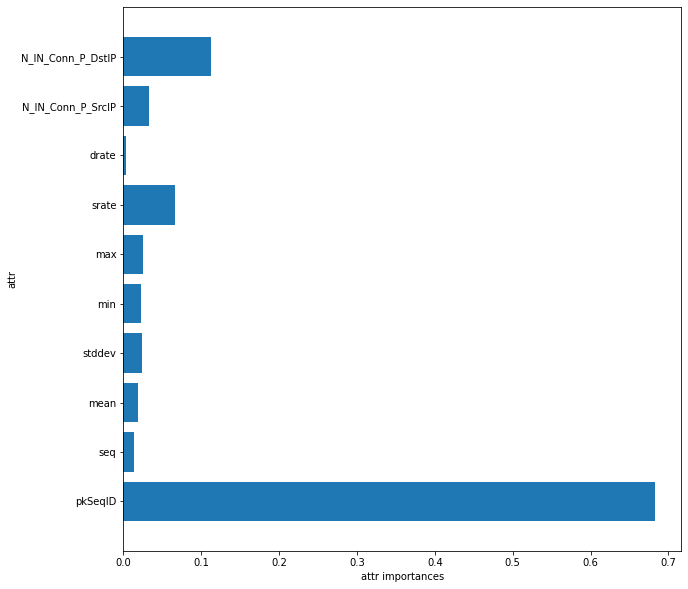

In [ ]:
def plot_feature_importances(model):
    
    n_features = Train_X.shape[1]
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), num_col)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.show()
    
plt.figure(figsize=(10, 10))
plot_feature_importances(rf)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(Train_X, Train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Train_Pred = xgb.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            31084      0       0               0      0
DoS                 0  26154       0               0      0
Normal              0      0     370               0      0
Reconnaissance      0      0       0            1458      0
Theft               0      0       0               0     65


In [ ]:
Test_Pred = xgb.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  1.0
Recall (Macro) 1.0
Precision (Macro) 1.0
F1 score (Macro) 1.0


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30836      0       0               0      0
DoS                 0  26409       0               0      0
Normal              0      0     107               0      0
Reconnaissance      0      0       0            1451      0
Theft               0      0       0               0     14


# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(Train_X, Train_Y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
Train_Pred = lgbm.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.7060425157700698
Recall (Macro) 0.48765039756979256


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Macro) 0.40576481879216447
F1 score (Macro) 0.42015217320097575


category_pred    DDoS    DoS  Normal  Reconnaissance
category                                            
DDoS            16759  13415       6             904
DoS              2621  23533       0               0
Normal             17     21       0             332
Reconnaissance      0      1       0            1457
Theft               0      0       0              65


In [ ]:
Test_Pred = lgbm.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.7104918645969702
Recall (Macro) 0.48680231890510656


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Macro) 0.41679068744589437
F1 score (Macro) 0.42902630208575443


category_pred    DDoS    DoS  Normal  Reconnaissance
category                                            
DDoS            16586  13308       5             937
DoS              2652  23757       0               0
Normal              5     11       0              91
Reconnaissance      1      4       0            1446
Theft               1      0       0              13


# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(Train_X, Train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Train_Pred = nb.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.9047031168084423
Recall (Macro) 0.8083850954005932
Precision (Macro) 0.9346715596614033
F1 score (Macro) 0.8232709059626524


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30329    755       0               0      0
DoS              4592  21562       0               0      0
Normal              0      0      92             278      0
Reconnaissance     10      0       0            1448      0
Theft               0      0       0               0     65


In [ ]:
Test_Pred = nb.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9070336807385619
Recall (Macro) 0.8051866949014705
Precision (Macro) 0.934580410223256
F1 score (Macro) 0.8294252928846818


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30091    745       0               0      0
DoS              4629  21780       0               0      0
Normal              0      1      25              81      0
Reconnaissance      9      0       3            1439      0
Theft               0      0       0               0     14


# Naive Bayes with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

nb = GaussianNB()

cv_method = KFold(n_splits=5, shuffle=True)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_gs = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 scoring='accuracy',
                 cv=cv_method, 
                 verbose=1,
                 n_jobs=2)

nb_gs.fit(Train_X, Train_Y)

nb_gs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 230 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    6.6s finished


{'var_smoothing': 0.012328467394420659}

In [ ]:
nb_gs = GaussianNB(var_smoothing=0.012328467394420659)
nb_gs.fit(Train_X, Train_Y)

GaussianNB(priors=None, var_smoothing=0.012328467394420659)

In [ ]:
Train_Pred = nb_gs.predict(Train_X)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.9214456038287869
Recall (Macro) 0.6305261583967883
Precision (Macro) 0.8251478492095543
F1 score (Macro) 0.6404329116624987


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            31001     83       0               0      0
DoS              4157  21997       0               0      0
Normal              0      5      29             319     17
Reconnaissance     14      0       1            1443      0
Theft               0      0       0              49     16


In [ ]:
Test_Pred = nb_gs.predict(Test_X)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9256847510073618
Recall (Macro) 0.6554216797092165
Precision (Macro) 0.8050746169012925
F1 score (Macro) 0.6779624673590564


category_pred    DDoS    DoS  Normal  Reconnaissance  Theft
category                                                   
DDoS            30766     70       0               0      0
DoS              4176  22233       0               0      0
Normal              0      0      10              92      5
Reconnaissance     15      0       4            1432      0
Theft               0      0       0               9      5


# ANN

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohenc = OneHotEncoder()
ohenc.fit(Train_Y.reshape(-1, 1))
Train_Y_OH = ohenc.transform(Train_Y.reshape(-1, 1)).toarray()

In [ ]:
Train_Y_OH

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics


Input = tf.keras.layers.Input(shape=(Train_X.shape[1],)) # 32: 변수 개수, batch_shape=(self.batch_size, 34,) # keras reularizer뺀게 더 좋음!
hidden1 = tf.keras.layers.Dense(84, activation='relu')(Input)
hidden1 = tf.keras.layers.Dense(84, activation='relu')(Input)
Output = tf.keras.layers.Dense(5)(hidden1)

model = tf.keras.models.Model(Input, Output)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.losses.MeanSquaredError(), metrics = [metrics.mse, metrics.categorical_accuracy])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=2, mode='min')
model.fit(Train_X, Train_Y_OH, epochs = 20, batch_size=256, callbacks = [early_stopping])

Epoch 1/20
231/231 [==============================] - 2s 2ms/step - loss: 0.0625 - mean_squared_error: 0.0625 - categorical_accuracy: 0.9170
Epoch 2/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - categorical_accuracy: 0.9905
Epoch 3/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - categorical_accuracy: 0.9943
Epoch 4/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - categorical_accuracy: 0.9947
Epoch 5/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - categorical_accuracy: 0.9952
Epoch 6/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - categorical_accuracy: 0.9950
Epoch 7/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - categorical_accuracy: 0.9952


In [ ]:
Train_Pred = model.predict(Train_X)
Train_Pred = np.argmax(Train_Pred, axis = 1)
eval_Train(Train_Pred, Train_Label)

Train Accuracy:  0.9952478395427102
Recall (Macro) 0.7776770274752998


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Macro) 0.7172747008330859
F1 score (Macro) 0.7364133011423136


category_pred    DDoS    DoS  Normal  Reconnaissance
category                                            
DDoS            31028     18      37               1
DoS                 3  26151       0               0
Normal              0      0     369               1
Reconnaissance      0      0     156            1302
Theft               0      0      64               1


In [ ]:
Test_Pred = model.predict(Test_X)
Test_Pred = np.argmax(Test_Pred, axis = 1)
eval_Test(Test_Pred, Test_Label)

Test Accuracy:  0.9960385602801911
Recall (Macro) 0.7771662624629702


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Macro) 0.6677824570143328
F1 score (Macro) 0.6899885095392747


category_pred    DDoS    DoS  Normal  Reconnaissance
category                                            
DDoS            30783     18      28               7
DoS                 3  26406       0               0
Normal              0      0     107               0
Reconnaissance      2      0     161            1288
Theft               0      0      14               0
